<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/RNN_GRU_for_active_wind_power_10_seconds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **One step univariate model**

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
df = pd.read_csv(url1)

In [2]:
df=pd.DataFrame(df)
#df.rename(columns = {'Average Wind Speed (m/s)':'avg_wind_speed'}, inplace = True)
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
0,FECHA_HORA,SSV_5SM_006_XS_FRQ_MEDI,SSV_5SM_006_XS_TNS_FASR,SSV_5SM_006_XS_TNS_FASS,SSV_5SM_006_XS_TNS_FAST,SSV_5SM_006_XS_INT_FASR,SSV_5SM_006_XS_INT_FASS,SSV_5SM_006_XS_INT_FAST,SSV_5SM_006_XS_VEL_WIND,SSV_5SM_006_XS_POT_MEDI,SSV_5SM_006_XS_POT_REAC,SSV_5SM_006_XS_VEL_LGMD,SSV_5SM_006_XS_PRS_PRPL,SSV_5SM_006_XS_TMP_0004,SSV_5SM_006_XS_TMP_V006,SSV_5SM_006_XS_TMP_V007,SSV_5SM_006_XS_TMP_V008,SSV_5SM_006_XS_TMP_V003,SSV_5SM_006_XS_TMP_V004,SSV_5SM_006_XS_TMP_V005,SSV_5SM_006_XS_TMP_V002,SSV_5SM_006_XS_TMP_V001,SSV_5SM_006_XS_TMP_0008,SSV_5SM_006_XS_TMP_0007
1,24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
2,24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
3,24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
4,24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
8637,24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
8638,24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3
8639,24/06/2021 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.7,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3


In [3]:
df=df.drop(0)
df

,Date & Time,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
1,24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
2,24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
3,24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
4,24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
5,24/06/2021 00:00:40,50.31,593.3,585.5,589.4,421.5,421.2,430.8,10.5,744,3.8,1529.8,180,31.5,34.2,70,79.6,139.2,133.6,137.3,53.7,43.8,74.3,72.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
8637,24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
8638,24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3
8639,24/06/2021 23:59:40,50.1,582.5,577.5,576.7,270.7,272.2,268,8.4,465.7,-0.8,1512.8,177.4,30.9,32.2,61.4,73.6,95.2,90.7,94.9,53.7,43.6,62,65.3


In [4]:
df=df.set_index('Date & Time')
df

,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
Date & Time,,,,,,,,,,,,,,,,,,,,,,,
24/06/2021 00:00:00,50.27,590.5,588.6,585.7,435.7,427.5,426.6,10.4,737.8,1.3,1486.6,166.7,31.6,34.2,70.2,79.7,139.9,132.9,138.1,53.3,43.9,74.6,72.4
24/06/2021 00:00:10,50.26,585.6,587.4,591.3,418.9,413.6,410.7,11.4,745.5,1.7,1482.2,180.3,31.4,34.3,69.5,79.9,139.1,132.5,138.1,53.6,43.8,74.5,72.6
24/06/2021 00:00:20,50.24,591.8,589.5,586.5,429.8,425.6,421.3,10.2,732.7,8.2,1500,166.8,31.4,34.3,69.6,79.9,139.8,133.4,138.2,53.6,43.9,74.5,72.7
24/06/2021 00:00:30,50.22,591.1,588.5,584.5,425.9,427.1,441.2,10.1,743.1,8.4,1493.2,167.4,31.4,34.3,70.2,79.7,139.5,133.2,137.8,53.7,43.9,74.6,72.7
24/06/2021 00:00:40,50.31,593.3,585.5,589.4,421.5,421.2,430.8,10.5,744,3.8,1529.8,180,31.5,34.2,70,79.6,139.2,133.6,137.3,53.7,43.8,74.3,72.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/06/2021 23:59:10,50.04,581.8,580.3,581.1,236.1,237,236.7,7.9,404.2,-7.2,1468.4,179.8,31,32.3,60.8,73.4,95.2,90.9,95.9,53.6,43.7,61.8,65.4
24/06/2021 23:59:20,50.12,580.4,581,583.2,217.6,221.4,220.9,7.4,367.3,8.5,1426.5,162.7,31,32.3,61.3,73.8,95,89.4,95,53.6,43.7,61.8,65.2
24/06/2021 23:59:30,50.08,578.3,583.7,580.9,195.9,196.9,191.6,7.7,329.3,-23.3,1425.1,169.7,31,32.2,60.5,73.6,94,90.4,94.1,53.8,43.7,61.9,65.3


In [5]:
df.describe()

,Frequency Hz,Voltage R Phase V,Voltage S Phase V,Voltage T Phase V,Current R Phase A,Current S Phase A,Current T Phase A,Wind Speed m/s,Active Power kW,Reactive Power kVAR,Generator RPM,Hydraulic unit Pressure in bar,Ambient Temperature,Nacelle Temperature,Gearbox oil Temperature,Gearbox Bearing Temperature,Generator Winding Temperature R,Generator Winding Temperature S,Generator Winding Temperature T,Hydraulic oil Temperature,Main bearing Temperature,Generator Bearing Temperature DE,Generator Bearing Temperature NDE
count,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640,8640
unique,42,345,328,327,2786,2760,2756,66,4092,515,418,207,28,34,126,103,569,542,547,28,12,176,163
top,50.06,587.7,585.8,582.4,426.9,427.5,416.9,9.8,729.9,1.1,1499.2,171.4,31.2,32.6,69.4,79.1,142.9,136.1,140.9,54.3,43.9,60.9,74.6
freq,654,66,64,73,22,20,23,501,14,64,141,79,905,876,203,214,47,63,55,775,1425,160,200


In [6]:
fig = px.line(df,x=df.index, y='Active Power kW') 
fig.show()

# **Train, validation and test sets**

In [7]:
L=len(df)
valid_start=int(18*L/20)
test_start=int(19*L/20)

train,valid,test=df[:valid_start],df[valid_start:test_start],df[test_start:L]  #seperate train and test data arrays
print(train.shape)
print(valid.shape)
print(test.shape)

print(train.describe())
print(valid.describe())
print(test.describe())

(7776, 23)
(432, 23)
(432, 23)
       Frequency Hz  ... Generator Bearing Temperature NDE
count          7776  ...                              7776
unique           42  ...                               153
top           50.06  ...                              74.6
freq            599  ...                               200

[4 rows x 23 columns]
       Frequency Hz  ... Generator Bearing Temperature NDE
count           432  ...                               432
unique           25  ...                                12
top           50.14  ...                              65.3
freq             38  ...                               118

[4 rows x 23 columns]
       Frequency Hz  ... Generator Bearing Temperature NDE
count           432  ...                               432
unique           22  ...                                 8
top           50.08  ...                              65.1
freq             56  ...                               127

[4 rows x 23 columns]


In [8]:
fig1 = px.line(df,x=df.index, y='Active Power kW') 
fig1.show()

fig2 = px.line(df,x=df.index, y="Wind Speed m/s") 
fig2.show()

In [9]:
print(train)

                    Frequency Hz  ... Generator Bearing Temperature NDE
Date & Time                       ...                                  
24/06/2021 00:00:00        50.27  ...                              72.4
24/06/2021 00:00:10        50.26  ...                              72.6
24/06/2021 00:00:20        50.24  ...                              72.7
24/06/2021 00:00:30        50.22  ...                              72.7
24/06/2021 00:00:40        50.31  ...                              72.8
...                          ...  ...                               ...
24/06/2021 21:35:10           50  ...                              66.1
24/06/2021 21:35:20        49.98  ...                                66
24/06/2021 21:35:30           50  ...                              65.9
24/06/2021 21:35:40        50.06  ...                              65.9
24/06/2021 21:35:50        50.08  ...                              65.9

[7776 rows x 23 columns]


# **Data preparation**

In [10]:
T = 6
HORIZON = 1

**Data preparation - Training data**

In [11]:
scaler = MinMaxScaler()
train=pd.DataFrame(train['Active Power kW'])
train['Active Power kW'] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted['Active Power kW'].shift(-1)
train_shifted.head(10)

,Active Power kW,y_t+1
Date & Time,,
24/06/2021 00:00:00,0.90,0.91
24/06/2021 00:00:10,0.91,0.89
24/06/2021 00:00:20,0.89,0.91
24/06/2021 00:00:30,0.91,0.91
24/06/2021 00:00:40,0.91,0.84
24/06/2021 00:00:50,0.84,0.95
24/06/2021 00:01:00,0.95,0.86
24/06/2021 00:01:10,0.86,0.89
24/06/2021 00:01:20,0.89,0.88


In [12]:
'''for t in range(1, T+1):
    train_shifted[str(T-t)] = train_shifted['Average Wind Speed (m/s)'].shift(T-t, freq='H')
y_col = 'y_t+1'
X_cols = ['wind_speed_t-5',
             'wind_speed_t-4',
             'wind_speed_t-3',
             'wind_speed_t-2',
             'wind_speed_t-1',
             'wind_speed_t']
train_shifted.columns = ['original_wind_speed']+[y_col]+X_cols'''
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted['Active Power kW'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Active Power kW':'Original_active_power'})
train_shifted
# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(10)

,Original_active_power,y_t+1,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,
24/06/2021 00:00:50,0.84,0.95,0.90,0.91,0.89,0.91,0.91,0.84
24/06/2021 00:01:00,0.95,0.86,0.91,0.89,0.91,0.91,0.84,0.95
24/06/2021 00:01:10,0.86,0.89,0.89,0.91,0.91,0.84,0.95,0.86
24/06/2021 00:01:20,0.89,0.88,0.91,0.91,0.84,0.95,0.86,0.89
24/06/2021 00:01:30,0.88,0.86,0.91,0.84,0.95,0.86,0.89,0.88
24/06/2021 00:01:40,0.86,0.92,0.84,0.95,0.86,0.89,0.88,0.86
24/06/2021 00:01:50,0.92,0.90,0.95,0.86,0.89,0.88,0.86,0.92
24/06/2021 00:02:00,0.90,0.89,0.86,0.89,0.88,0.86,0.92,0.90
24/06/2021 00:02:10,0.89,0.93,0.89,0.88,0.86,0.92,0.90,0.89


In [13]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [14]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [15]:
y_train.shape

(7770,)

In [16]:
y_train[:3]

array([0.95, 0.86, 0.89])

In [17]:
X_train.shape

(7770, 6, 1)

In [18]:
X_train[:3]

array([[[0.9 ],
        [0.91],
        [0.89],
        [0.91],
        [0.91],
        [0.84]],

       [[0.91],
        [0.89],
        [0.91],
        [0.91],
        [0.84],
        [0.95]],

       [[0.89],
        [0.91],
        [0.91],
        [0.84],
        [0.95],
        [0.86]]])

In [19]:
train_shifted.head(3)

,Original_active_power,y_t+1,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,
24/06/2021 00:00:50,0.84,0.95,0.90,0.91,0.89,0.91,0.91,0.84
24/06/2021 00:01:00,0.95,0.86,0.91,0.89,0.91,0.91,0.84,0.95
24/06/2021 00:01:10,0.86,0.89,0.89,0.91,0.91,0.84,0.95,0.86


**Data preparation - Validation data**

In [20]:
valid=pd.DataFrame(valid['Active Power kW'])
valid

,Active Power kW
Date & Time,
24/06/2021 21:36:00,252.6
24/06/2021 21:36:10,239
24/06/2021 21:36:20,237.8
24/06/2021 21:36:30,240
24/06/2021 21:36:40,259.1
...,...
24/06/2021 22:47:10,344.5
24/06/2021 22:47:20,344.5
24/06/2021 22:47:30,354.7


In [21]:
valid_new=df[valid_start-T+1:test_start]
valid_new=pd.DataFrame(valid_new['Active Power kW'])
valid_new.head(20)

,Active Power kW
Date & Time,
24/06/2021 21:35:10,306.8
24/06/2021 21:35:20,268.6
24/06/2021 21:35:30,262
24/06/2021 21:35:40,294.8
24/06/2021 21:35:50,313.7
24/06/2021 21:36:00,252.6
24/06/2021 21:36:10,239
24/06/2021 21:36:20,237.8
24/06/2021 21:36:30,240


In [22]:
valid_new['Active Power kW']=scaler.transform(valid_new)
valid_new.head()

,Active Power kW
Date & Time,
24/06/2021 21:35:10,0.20
24/06/2021 21:35:20,0.14
24/06/2021 21:35:30,0.13
24/06/2021 21:35:40,0.18
24/06/2021 21:35:50,0.21


In [23]:
valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted['Active Power kW'].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted['Active Power kW'].shift(T-t)
vali_shifted = valid_shifted.rename(columns={'Active Power kW':'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')
print(valid_shifted)
y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

                     Active Power kW  y_t+1  ...  active_power_t-1  active_power_t-0
Date & Time                                  ...                                    
24/06/2021 21:36:00             0.11   0.09  ...              0.21              0.11
24/06/2021 21:36:10             0.09   0.09  ...              0.11              0.09
24/06/2021 21:36:20             0.09   0.09  ...              0.09              0.09
24/06/2021 21:36:30             0.09   0.12  ...              0.09              0.09
24/06/2021 21:36:40             0.12   0.04  ...              0.09              0.12
...                              ...    ...  ...               ...               ...
24/06/2021 22:47:00             0.35   0.26  ...              0.35              0.35
24/06/2021 22:47:10             0.26   0.26  ...              0.35              0.26
24/06/2021 22:47:20             0.26   0.28  ...              0.26              0.26
24/06/2021 22:47:30             0.28   0.30  ...              0.2

In [24]:
y_valid.shape

(431,)

In [25]:
y_valid[:3]

array([0.09, 0.09, 0.09])

In [26]:
X_valid.shape

(431, 6, 1)

In [27]:
X_valid[:3]

array([[[0.2 ],
        [0.14],
        [0.13],
        [0.18],
        [0.21],
        [0.11]],

       [[0.14],
        [0.13],
        [0.18],
        [0.21],
        [0.11],
        [0.09]],

       [[0.13],
        [0.18],
        [0.21],
        [0.11],
        [0.09],
        [0.09]]])

# **Implement the RNN**

In [28]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [29]:
LATENT_DIM = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples

In [30]:
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(HORIZON))


Use mean squared error as the loss function. The Keras documentation recommends the optimizer RMSprop for RNNs.

In [31]:
model.compile(optimizer='RMSprop', loss='mse')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [33]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [34]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/10
243/243 [==============================] - 4s 7ms/step - loss: 0.0181 - val_loss: 0.0068
Epoch 2/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0057
Epoch 3/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0079 - val_loss: 0.0058
Epoch 4/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0078 - val_loss: 0.0053
Epoch 5/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 6/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0053
Epoch 7/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 8/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 9/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0051
Epoch 10/10
243/243 [==============================] - 1s 5ms/step - loss: 0.0075 - val_loss: 0.0049

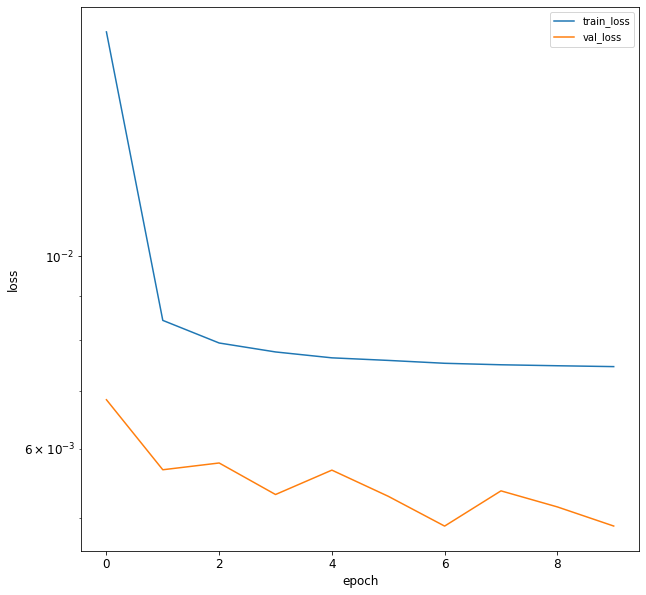

In [35]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model**

In [36]:
#test_forecasted=pd.DataFrame(test[' Forecasted Power (kW) '])
test=pd.DataFrame(test['Active Power kW'])
test_new=df[test_start-T+1:L]
test_new=pd.DataFrame(test_new['Active Power kW'])

test_new['Active Power kW']=scaler.transform(test_new)

test_shifted = test_new.copy()
test_shifted['y_t+1'] = test_shifted['Active Power kW'].shift(-1)
print(test_shifted)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted['Active Power kW'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Active Power kW':'Original_active_power'})

test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['Original_active_power'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)

                     Active Power kW  y_t+1
Date & Time                                
24/06/2021 22:47:10             0.26   0.26
24/06/2021 22:47:20             0.26   0.28
24/06/2021 22:47:30             0.28   0.30
24/06/2021 22:47:40             0.30   0.38
24/06/2021 22:47:50             0.38   0.42
...                              ...    ...
24/06/2021 23:59:10             0.36   0.30
24/06/2021 23:59:20             0.30   0.24
24/06/2021 23:59:30             0.24   0.46
24/06/2021 23:59:40             0.46   0.49
24/06/2021 23:59:50             0.49    nan

[437 rows x 2 columns]


In [37]:
y_test.shape

(431,)

In [38]:
X_test.shape

(431, 6, 1)

**Make predictions on test set**

In [39]:
predictions = model.predict(X_test)
predictions

array([[ 0.41],
       [ 0.37],
       [ 0.33],
       [ 0.31],
       [ 0.34],
       [ 0.3 ],
       [ 0.26],
       [ 0.25],
       [ 0.2 ],
       [ 0.12],
       [ 0.07],
       [ 0.12],
       [ 0.1 ],
       [ 0.09],
       [ 0.08],
       [ 0.11],
       [ 0.13],
       [ 0.13],
       [ 0.15],
       [ 0.18],
       [ 0.19],
       [ 0.22],
       [ 0.22],
       [ 0.28],
       [ 0.2 ],
       [ 0.26],
       [ 0.22],
       [ 0.18],
       [ 0.14],
       [ 0.25],
       [ 0.28],
       [ 0.25],
       [ 0.32],
       [ 0.42],
       [ 0.46],
       [ 0.36],
       [ 0.2 ],
       [ 0.28],
       [ 0.43],
       [ 0.32],
       [ 0.24],
       [ 0.26],
       [ 0.26],
       [ 0.31],
       [ 0.33],
       [ 0.31],
       [ 0.32],
       [ 0.32],
       [ 0.3 ],
       [ 0.24],
       [ 0.23],
       [ 0.23],
       [ 0.21],
       [ 0.13],
       [ 0.13],
       [ 0.2 ],
       [ 0.29],
       [ 0.37],
       [ 0.44],
       [ 0.48],
       [ 0.38],
       [ 0.35],
       [

In [40]:
predictions=pd.DataFrame(predictions)
predictions

,0
0,0.41
1,0.37
2,0.33
3,0.31
4,0.34
...,...
426,0.33
427,0.38
428,0.30
429,0.26


In [41]:
forecasted_values=np.array(test_forecasted[' Forecasted Power (kW) '])
forecasted_values=pd.DataFrame(forecasted_values)
forecasted_values

NameError: ignored

In [42]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
#eval_df['forecasted_values']=forecasted_values
eval_df

,timestamp,h,prediction,actual
0,24/06/2021 22:48:00,t+1,0.41,0.42
1,24/06/2021 22:48:10,t+1,0.37,0.38
2,24/06/2021 22:48:20,t+1,0.33,0.32
3,24/06/2021 22:48:30,t+1,0.31,0.28
4,24/06/2021 22:48:40,t+1,0.34,0.32
...,...,...,...,...
426,24/06/2021 23:59:00,t+1,0.33,0.29
427,24/06/2021 23:59:10,t+1,0.38,0.36
428,24/06/2021 23:59:20,t+1,0.30,0.30
429,24/06/2021 23:59:30,t+1,0.26,0.24


In [43]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df[['Our_prediction_diff']]=np.abs(eval_df['prediction']-eval_df['actual'])
#eval_df[['CEB_prediction_diff']]=np.abs(eval_df['forecasted_values']-eval_df['actual'])
eval_df['our_rs_eror']=np.sqrt(np.abs(eval_df['prediction']-eval_df['actual']))
#eval_df['rs_error']=np.sqrt(np.abs(eval_df['forecasted_values']-eval_df['actual']))
#eval_df[['prediction']].shape
eval_df

,timestamp,h,prediction,actual,Our_prediction_diff,our_rs_eror
0,24/06/2021 22:48:00,t+1,433.00,440.40,7.40,2.72
1,24/06/2021 22:48:10,t+1,411.70,414.40,2.70,1.64
2,24/06/2021 22:48:20,t+1,385.91,377.40,8.51,2.92
3,24/06/2021 22:48:30,t+1,371.46,357.20,14.26,3.78
4,24/06/2021 22:48:40,t+1,393.37,381.60,11.77,3.43
...,...,...,...,...,...,...
426,24/06/2021 23:59:00,t+1,387.53,360.60,26.93,5.19
427,24/06/2021 23:59:10,t+1,415.45,404.20,11.25,3.35
428,24/06/2021 23:59:20,t+1,370.81,367.30,3.51,1.87
429,24/06/2021 23:59:30,t+1,342.54,329.30,13.24,3.64


**Compute the mean absolute percentage error(MAPE) over all predictions**

In [44]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

2.580628139643303

**MAPE of CEB preictions**

In [ ]:
def mape(actual, forecasted): 
    actual, pred = np.array(actual), np.array(forecasted)
    return np.mean(np.abs((actual - forecasted) / actual)) * 100

actual = eval_df['actual']
forecasted = eval_df['forecasted_values']

mape(actual, forecasted)


**Plot the predictions vs the actuals for the test data**

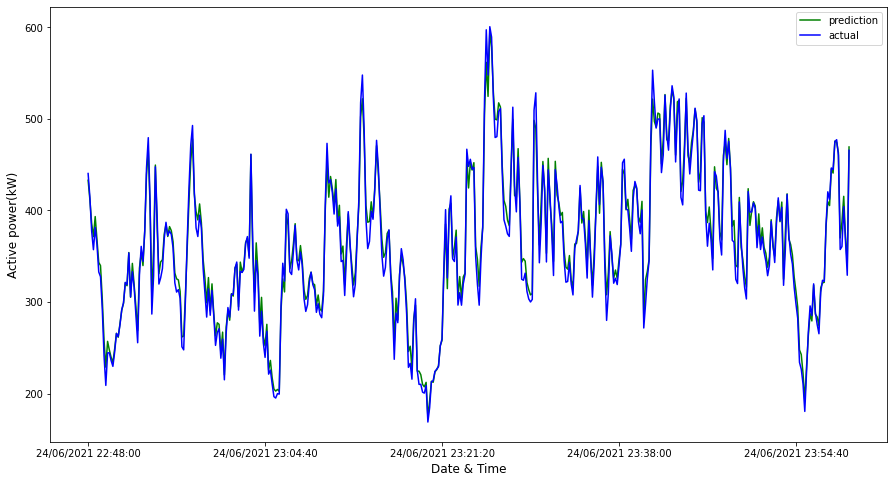

In [45]:
eval_df[eval_df.timestamp<'24/06/2021 23:59:50'].plot(x='timestamp', y=['prediction', 'actual'], style=['g', 'b'], figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=12)
plt.ylabel('Active power(kW)', fontsize=12)
plt.show()

#eval_df[eval_df.timestamp<'8/31/2021 23:50'].plot(x='timestamp', y=['forecasted_values', 'actual'], style=['r', 'b'], figsize=(15, 8))
